In [1]:
import pandas as pd
data = pd.read_csv('../datasets/diabetes.csv',sep=',')
# Statistics

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [13]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Split data

In [14]:
# First way (use iloc)
y = data.iloc[:,-1]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [15]:
x = data.iloc[:,:-1]
x[:5]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [17]:
# Second way
x = data.drop('Outcome', axis=1)
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
y = data['Outcome'] 
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

### Split for train & test

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_train.shape)

(614, 8)
(614, 8)


### Scaling

In [28]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [33]:
x_train

array([[-0.52639686, -1.15139792, -3.75268255, ..., -4.13525578,
        -0.49073479, -1.03594038],
       [ 1.58804586, -0.27664283,  0.68034485, ..., -0.48916881,
         2.41502991,  1.48710085],
       [-0.82846011,  0.56687102, -1.2658623 , ..., -0.42452187,
         0.54916055, -0.94893896],
       ...,
       [ 1.8901091 , -0.62029661,  0.89659009, ...,  1.76054443,
         1.981245  ,  0.44308379],
       [-1.13052335,  0.62935353, -3.75268255, ...,  1.34680407,
        -0.78487662, -0.33992901],
       [-1.13052335,  0.12949347,  1.43720319, ..., -1.22614383,
        -0.61552223, -1.03594038]])

### Using some models

In [37]:
clf = SVC()
clf.fit(x_train, y_train)

SVC()

In [38]:
y_pred = clf.predict(x_test)
print(y_pred.shape)
print(y_test.shape)

(154,)
(154,)


In [39]:
for actual, predict in zip(y_test,y_pred):
    print(actual, predict)

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
1 0
0 1
1 0
0 1
0 0
1 0
0 0
0 0
1 1
1 1
0 0
0 0
0 0
0 0
0 1
1 1
0 0
0 0
1 0
0 0
1 1
1 1
1 1
1 1
0 1
1 1
1 0
1 0
0 0
1 1
0 0
0 0
0 1
1 0
0 0
1 1
1 1
0 0
0 0
0 1
0 0
1 1
1 1
1 0
0 0
0 0
0 1
0 0
0 0
1 1
1 1
0 0
0 0
1 0
0 0
0 1
0 0
1 1
0 0
1 0
0 1
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 0
0 0
0 0
0 0
1 1
1 1
1 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 1
0 0
0 0
1 0
0 0
0 1
0 0
1 0
0 1
1 1
0 0
0 0
1 1
1 0
1 1
0 0
0 0
0 0
1 1
0 0
0 0
1 1
0 0
0 0
0 1
0 0
0 0
1 0
0 0
0 0
0 0
1 0
1 1
1 1
0 1
1 1
1 1
0 0
1 0
1 1
0 0
1 0
1 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
1 1
0 0
0 0
1 0
0 0


In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        99
           1       0.65      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



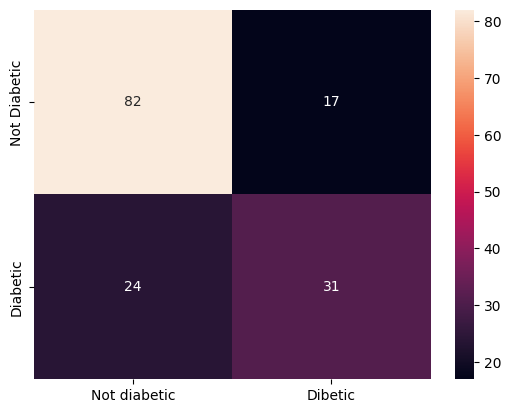

In [ ]:
# Visualize confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(data=cm,annot=True,xticklabels=["Not diabetic", "Dibetic"],
            yticklabels=["Not Diabetic", "Diabetic"])
plt.savefig("diabetes.png")
plt.show()

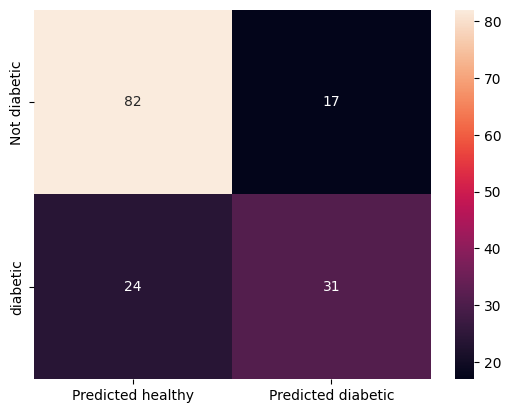

In [59]:
# Another way
cm = np.array(confusion_matrix(y_test, y_pred, labels=[0,1]))
dataframe = pd.DataFrame(cm, index=["Not diabetic", "diabetic"], columns=["Predicted healthy", "Predicted diabetic"])
sns.heatmap(dataframe,annot=True)
plt.savefig("diabetes2.png")

In [ ]:
# Random forests
clf = RandomForestClassifier()